Cài đặt thư viện

In [ ]:
!pip install matplotlib==3.1.3
!pip install osmnet
!pip install folium
!pip install rtree
!pip install pygeos
!pip install geojson
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 9.3 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/col

In [ ]:
!git clone https://github.com/CityScope/CSL_HCMC

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1957, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 1957 (delta 7), reused 1 (delta 1), pack-reused 1911
Receiving objects: 100% (1957/1957), 175.52 MiB | 20.63 MiB/s, done.
Resolving deltas: 100% (1064/1064), done.
Updating files: 100% (542/542), done.


In [23]:
import geopandas as gpd
import numpy as np
import rtree
import matplotlib.pyplot as plt
import folium
import osmnet
import geojson
import pygeos
import pandas as pd

Load ranh giới quận huyện và dân số quận huyện

In [ ]:
df = gpd.read_file('/content/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')
df.head(5)

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,...,24749.60,25589.30,25962.10,25098.20,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,...,38897.10,39227.20,39326.30,39862.10,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,...,44428.40,44466.50,44789.30,44686.40,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,...,36105.70,37261.60,36010.20,36256.90,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."


## Load dữ liệu click từ người dùng

In [30]:
fp = '/content/click_data.json'
click_data = gpd.read_file(fp)
click_data.head()

,dbh,geometry
0,1,POINT (106.71136 10.85113)
1,1,POINT (106.71695 10.74449)
2,1,POINT (106.66315 10.83289)
3,1,POINT (106.66267 10.83339)
4,1,POINT (106.65977 10.83729)


## Lọc ra 5 quận huyện có tốc độ tăng MẬT ĐỘ dân số nhanh nhất (Dùng dữ liệu 2019  và 2017)

In [32]:
df['Den_2019/Den_2017'] = df['Den_2019'] / df['Den_2017']
max5 = df.nlargest(5, 'Den_2019/Den_2017')
max5


,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,Den_2019/Den_2017
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,...,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,"POLYGON ((701125.957 1205414.891, 701162.391 1...",1.277620
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,"POLYGON ((673061.206 1208548.077, 673094.550 1...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,...,1254.48,1313.90,1385.46,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,"POLYGON ((688444.826 1185726.125, 688568.759 1...",1.162075
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,"POLYGON ((685183.891 1205265.848, 685198.395 1...",1.129461
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,...,2812.21,2809.25,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,"POLYGON ((690496.729 1195354.084, 690716.888 1...",1.113106


##Dùng spatial join (from geopandas.tools import sjoin) để lọc ra các điểm click của người dùng trong 5 quận/huyện hot nhất

In [33]:
from geopandas.tools import sjoin

In [34]:
click_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
max5 = max5.to_crs(4326)
max5

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,Den_2019/Den_2017
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,...,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,"POLYGON ((106.84015 10.89893, 106.84048 10.897...",1.277620
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,"POLYGON ((106.58361 10.92869, 106.58391 10.928...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,...,1254.48,1313.90,1385.46,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,"POLYGON ((106.72315 10.72162, 106.72428 10.721...",1.162075
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,"POLYGON ((106.69433 10.89842, 106.69446 10.897...",1.129461
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,...,2812.21,2809.25,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,"POLYGON ((106.74241 10.80855, 106.74442 10.808...",1.113106


In [37]:
click_top5 = sjoin(click_data, max5, how ='left', op='within')
click_top5 = click_top5.dropna()
click_top5

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,Den_2019/Den_2017
126,1,POINT (106.57481 10.90807),23.0,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,...,3634.00,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,1.215639
222,1,POINT (106.76471 10.82926),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2419.33,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,1.277620
283,1,POINT (106.76238 10.59443),18.0,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,...,1188.34,1254.48,1313.90,1385.46,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,1.162075
342,1,POINT (106.68818 10.85636),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129461
368,1,POINT (106.71118 10.85242),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83292,1,POINT (106.71130 10.85206),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129461
83372,1,POINT (106.76182 10.82430),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2419.33,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,1.277620
83394,1,POINT (106.72823 10.78867),17.0,District 2,769,District,147490.0,140621.0,137749.0,134131.0,...,2685.95,2812.21,2809.25,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,1.113106
83466,1,POINT (106.71118 10.86631),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129461


<AxesSubplot:>

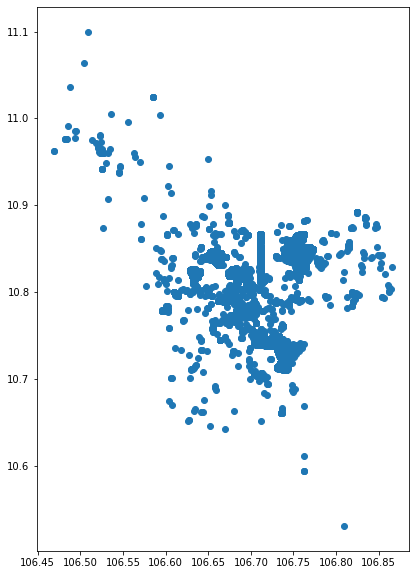

In [41]:
click_data.plot(figsize = (10, 10))

## chạy KMean cho top 5 quận huyện này. Lấy K = 20

In [40]:
from sklearn.cluster import KMeans

In [43]:
def kmeans(data_frame, par1, par2='geometry', n_clusters=20):
    table = data_frame[data_frame.Dist_Name == par1]
    kmeans = KMeans(n_clusters) 
    x = pd.Series(table[par2].apply(lambda p: p.x)) 
    y = pd.Series(table[par2].apply(lambda p: p.y)) 
    point = np.column_stack((x, y)) 
    y_means = kmeans.fit_predict(point) 
    table['cluster'] = y_means 
    return table

In [44]:
district_1 = kmeans(click_top5, 'District 9', 'geometry', 20);
district_2 = kmeans(click_top5, 'Hoc Mon', 'geometry', 20);
district_3 = kmeans(click_top5, 'Nha Be', 'geometry', 20)
district_4 = kmeans(click_top5, 'District 12', 'geometry', 20);
district_5 = kmeans(click_top5, 'District 2', 'geometry', 20);

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

## Lưu 01 cụm điểm nhiều nhất trong các quận huyện ở Bước 5.

In [47]:
index1 = district_1['cluster'].value_counts().idxmax()
index2 = district_2['cluster'].value_counts().idxmax()
index3 = district_3['cluster'].value_counts().idxmax()
index4 = district_4['cluster'].value_counts().idxmax()
index5 = district_5['cluster'].value_counts().idxmax()

In [48]:
cluster_data = dict()
cluster_data['District 9'] = district_1.where(district_1['cluster'] == index1).dropna()
cluster_data['Hoc Mon'] = district_2.where(district_2['cluster'] == index2).dropna()
cluster_data['Nha Be'] = district_3.where(district_3['cluster'] == index3).dropna()
cluster_data['District 12'] = district_4.where(district_4['cluster'] == index4).dropna()
cluster_data['District 2'] = district_5.where(district_5['cluster'] == index5).dropna()
cluster_data['Hoc Mon']

,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,Den_2019/Den_2017,cluster
21784,1.0,POINT (106.60194 10.86587),23.0,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,1.215639,11.0
49363,1.0,POINT (106.60183 10.86617),23.0,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,1.215639,11.0
55461,1.0,POINT (106.60181 10.86615),23.0,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,1.215639,11.0
74742,1.0,POINT (106.60175 10.86632),23.0,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,1.215639,11.0
79403,1.0,POINT (106.60172 10.86632),23.0,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,1.215639,11.0


## show lên bản đồ các cụm đông nhất theo từng quận huyện theo dạng HEATMAP

In [49]:
df = []
for clu in cluster_data.values():
  x = pd.Series(clu['geometry'].apply(lambda p: p.x)) 
  y = pd.Series(clu['geometry'].apply(lambda p: p.y))
  point = np.column_stack((y, x)) 
  df = df + point.tolist()

In [54]:
from glob import glob
from folium import plugins
from folium.plugins import HeatMap

map = folium.Map([10.8, 106.7], tiles ='CartoDB positron', zoom_start = 10)
HeatMap(df).add_to(map)

for _, r in max5.iterrows():
  sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
  geo_j = sim_geo.to_json()
  geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'fillColor': 'orange'})
  folium.Popup(r['Dist_Name']).add_to(geo_j)
  geo_j.add_to(map)
HeatMap(df).add_to(map);
map